In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
setting_of_crime = "../Data Analytics Bootcamp/Setting of Crime.csv"

In [3]:
setting_of_crime_df = pd.read_csv(setting_of_crime, encoding="utf-8")
setting_of_crime_df["Offence Count"] = pd.to_numeric(setting_of_crime_df["Offence Count"],errors = "coerce")
setting_of_crime_df["Offence Count"] = setting_of_crime_df["Offence Count"].replace(np.nan, 0)
setting_of_crime_df.head(635)

,Year,Year ending,Local Government Area,Location Division,Location Subdivision,Location Group,Offence Count
0,2021,December,Alpine,1 Residential,11 Dwelling - private,111 Flat/Unit/Apartment,5.0
1,2021,December,Alpine,1 Residential,11 Dwelling - private,112 House,207.0
2,2021,December,Alpine,1 Residential,11 Dwelling - private,114 Caravan/Mobile Home,5.0
3,2021,December,Alpine,1 Residential,11 Dwelling - private,116 Ministry Of Housing,1.0
4,2021,December,Alpine,1 Residential,11 Dwelling - private,117 Farm House,8.0
...,...,...,...,...,...,...,...
630,2021,December,Boroondara,3 Other,39 Other location,393 Construction Site,35.0
631,2021,December,Boroondara,3 Other,39 Other location,394 Veterinary Clinic,8.0
632,2021,December,Brimbank,1 Residential,11 Dwelling - private,111 Flat/Unit/Apartment,437.0
633,2021,December,Brimbank,1 Residential,11 Dwelling - private,112 House,0.0


In [37]:
setting_rank_df = setting_of_crime_df.loc[:,["Local Government Area", "Offence Count"]]
setting_rank_df = setting_rank_df.groupby(["Local Government Area"])
setting_rank_df = setting_rank_df.sum()
setting_rank_df = setting_rank_df.sort_values(by="Offence Count", ascending=False)
setting_rank_df.head(10)

,Offence Count
Local Government Area,
Melbourne,122035.0
Greater Geelong,89354.0
Hume,88567.0
Greater Dandenong,85218.0
Brimbank,82973.0
Casey,72900.0
Frankston,69949.0
Darebin,69286.0
Wyndham,65099.0


In [44]:
the_top_ten = setting_of_crime_df.loc[(setting_of_crime_df["Local Government Area"] == "Melbourne") 
                                      | (setting_of_crime_df["Local Government Area"] == "Greater Geelong")
                                      | (setting_of_crime_df["Local Government Area"] == "Hume")
                                      | (setting_of_crime_df["Local Government Area"] == "Greater Dandenong")
                                      | (setting_of_crime_df["Local Government Area"] == "Brimbank")
                                      | (setting_of_crime_df["Local Government Area"] == "Casey")
                                      | (setting_of_crime_df["Local Government Area"] == "Frankston")
                                      | (setting_of_crime_df["Local Government Area"] == "Darebin")
                                      | (setting_of_crime_df["Local Government Area"] == "Wyndham")
                                      | (setting_of_crime_df["Local Government Area"] == "Whittlesea"),:]



#the_top_ten=the_top_ten.loc[:, ["Location Subdivision", "Offence Count"]]
the_top_ten

,Year,Year ending,Local Government Area,Location Division,Location Subdivision,Location Group,Offence Count
632,2021,December,Brimbank,1 Residential,11 Dwelling - private,111 Flat/Unit/Apartment,437.0
633,2021,December,Brimbank,1 Residential,11 Dwelling - private,112 House,0.0
634,2021,December,Brimbank,1 Residential,11 Dwelling - private,113 Bungalow,41.0
635,2021,December,Brimbank,1 Residential,11 Dwelling - private,114 Caravan/Mobile Home,1.0
636,2021,December,Brimbank,1 Residential,11 Dwelling - private,115 Houseboat,6.0
...,...,...,...,...,...,...,...
53449,2012,December,Wyndham,3 Other,38 Recreational,385 Gaming Venue,26.0
53450,2012,December,Wyndham,3 Other,38 Recreational,386 Other Rec./Sports,49.0
53451,2012,December,Wyndham,3 Other,39 Other location,391 Massage Parlour/Brothel,1.0
53452,2012,December,Wyndham,3 Other,39 Other location,392 Other Location (Not Elsewhere),128.0


In [45]:
setting_of_crime_2_df=the_top_ten.loc[:, ["Location Division", "Offence Count"]]
setting_of_crime_2_df["Offence Count"] = pd.to_numeric(setting_of_crime_2_df["Offence Count"],errors = "coerce")
setting_of_crime_2_df

,Location Division,Offence Count
632,1 Residential,437.0
633,1 Residential,0.0
634,1 Residential,41.0
635,1 Residential,1.0
636,1 Residential,6.0
...,...,...
53449,3 Other,26.0
53450,3 Other,49.0
53451,3 Other,1.0
53452,3 Other,128.0


In [46]:
setting_division = setting_of_crime_2_df.groupby(["Location Division"])["Offence Count"].sum()
#setting_division_df = setting_division.count()
#setting_division_df
setting_division= pd.DataFrame(setting_division)
setting_division

,Offence Count
Location Division,
1 Residential,194277.0
2 Community,222234.0
3 Other,393066.0


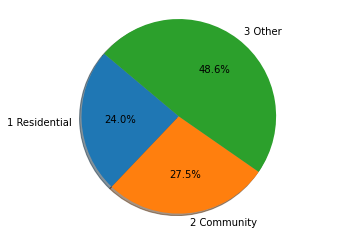

In [47]:
plt.pie(setting_division["Offence Count"], labels=setting_division.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [7]:
setting_of_crime_df["Location Subdivision"].unique()

array(['11 Dwelling - private', '12 Dwelling  - non-private',
       '13 Grounds/surrounding land', '21 Education', '22 Health',
       '25 Other Transport', '26 Justice', '27 Open Space',
       '28 Street/footpath', '29 Other community location',
       '31 Admin/professional', '32 Financial', '33 Retail',
       '37 Agricultural', '38 Recreational', '39 Other location',
       '24 Public Transport', '34 Wholesale', '35 Warehousing/storage',
       '36 Manufacturing', '23 Religious'], dtype=object)

In [52]:
only_other = the_top_ten.loc[the_top_ten["Location Division"] == "3 Other", :]
only_other

,Year,Year ending,Local Government Area,Location Division,Location Subdivision,Location Group,Offence Count
687,2021,December,Brimbank,3 Other,31 Admin/professional,311 Business Office,84.0
688,2021,December,Brimbank,3 Other,31 Admin/professional,312 Other Admin/Professional,28.0
689,2021,December,Brimbank,3 Other,32 Financial,321 Bank,48.0
690,2021,December,Brimbank,3 Other,32 Financial,323 ATM/Eftpos,12.0
691,2021,December,Brimbank,3 Other,32 Financial,324 Other Financial,2.0
...,...,...,...,...,...,...,...
53449,2012,December,Wyndham,3 Other,38 Recreational,385 Gaming Venue,26.0
53450,2012,December,Wyndham,3 Other,38 Recreational,386 Other Rec./Sports,49.0
53451,2012,December,Wyndham,3 Other,39 Other location,391 Massage Parlour/Brothel,1.0
53452,2012,December,Wyndham,3 Other,39 Other location,392 Other Location (Not Elsewhere),128.0


In [53]:
only_other=only_other.loc[:, ["Location Subdivision", "Offence Count"]]

In [54]:
only_other["Offence Count"] = pd.to_numeric(only_other["Offence Count"],errors = "coerce")
setting_only_other = only_other.groupby(["Location Subdivision"])
setting_only_other = setting_only_other.sum()
setting_only_other

,Offence Count
Location Subdivision,
31 Admin/professional,23380.0
32 Financial,10199.0
33 Retail,250719.0
34 Wholesale,1206.0
35 Warehousing/storage,9596.0
36 Manufacturing,17918.0
37 Agricultural,1801.0
38 Recreational,40064.0
39 Other location,38183.0


<AxesSubplot:title={'center':'Comparison of Offence Counts of location subdivision between the top 10 LGAs excluding residental and community'}, xlabel='Location Subdivision', ylabel='Offence Count'>

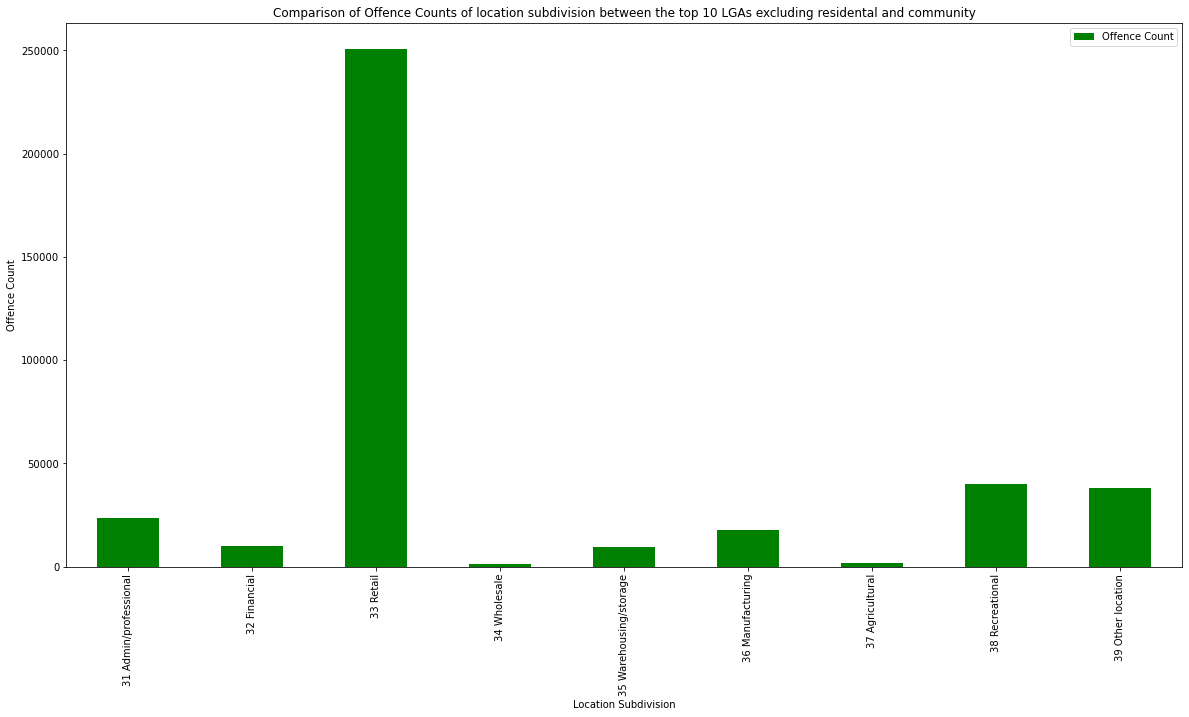

In [149]:
setting_only_other.plot(kind="bar", figsize=(20,10), 
                        xlabel="Location Subdivision", 
                        ylabel="Offence Count", 
                        title="Comparison of Offence Counts of location subdivision between the top 10 LGAs excluding residental and community", color="g")


In [60]:
only_res_full = the_top_ten.loc[the_top_ten["Location Division"] == "1 Residential", :]
only_res_full

,Year,Year ending,Local Government Area,Location Division,Location Subdivision,Location Group,Offence Count
632,2021,December,Brimbank,1 Residential,11 Dwelling - private,111 Flat/Unit/Apartment,437.0
633,2021,December,Brimbank,1 Residential,11 Dwelling - private,112 House,0.0
634,2021,December,Brimbank,1 Residential,11 Dwelling - private,113 Bungalow,41.0
635,2021,December,Brimbank,1 Residential,11 Dwelling - private,114 Caravan/Mobile Home,1.0
636,2021,December,Brimbank,1 Residential,11 Dwelling - private,115 Houseboat,6.0
...,...,...,...,...,...,...,...
53383,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,133 Frontyard,0.0
53384,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,134 Garage,168.0
53385,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,135 Shed,32.0
53386,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,136 Premises Under Construction,416.0


In [61]:
only_res=only_res_full.loc[:, ["Location Subdivision", "Offence Count"]]
only_res["Offence Count"] = pd.to_numeric(only_res["Offence Count"],errors = "coerce")
only_res


,Location Subdivision,Offence Count
632,11 Dwelling - private,437.0
633,11 Dwelling - private,0.0
634,11 Dwelling - private,41.0
635,11 Dwelling - private,1.0
636,11 Dwelling - private,6.0
...,...,...
53383,13 Grounds/surrounding land,0.0
53384,13 Grounds/surrounding land,168.0
53385,13 Grounds/surrounding land,32.0
53386,13 Grounds/surrounding land,416.0


In [62]:
setting_only_res = only_res.groupby(["Location Subdivision"])
setting_only_res = setting_only_res.sum()
setting_only_res

,Offence Count
Location Subdivision,
11 Dwelling - private,48173.0
12 Dwelling - non-private,19516.0
13 Grounds/surrounding land,126588.0


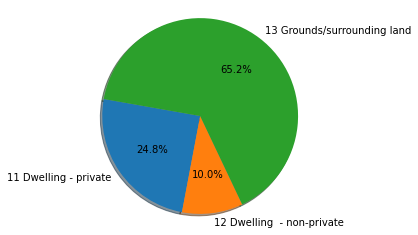

In [63]:
plt.pie(setting_only_res["Offence Count"], labels=setting_only_res.index,
        autopct="%1.1f%%", shadow=True, startangle=170)
plt.axis("equal")
plt.show()

In [68]:
only_res_3 = only_res_full.loc[(only_res_full["Location Subdivision"] == "13 Grounds/surrounding land")]
only_res_3["Offence Count"] = pd.to_numeric(only_res_3["Offence Count"],errors = "coerce")
only_res_3

<ipython-input-68-8de20419ab7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_res_3["Offence Count"] = pd.to_numeric(only_res_3["Offence Count"],errors = "coerce")


,Year,Year ending,Local Government Area,Location Division,Location Subdivision,Location Group,Offence Count
645,2021,December,Brimbank,1 Residential,13 Grounds/surrounding land,1310 Farm Building,1.0
646,2021,December,Brimbank,1 Residential,13 Grounds/surrounding land,132 Backyard,77.0
647,2021,December,Brimbank,1 Residential,13 Grounds/surrounding land,133 Frontyard,316.0
648,2021,December,Brimbank,1 Residential,13 Grounds/surrounding land,134 Garage,118.0
649,2021,December,Brimbank,1 Residential,13 Grounds/surrounding land,135 Shed,26.0
...,...,...,...,...,...,...,...
53383,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,133 Frontyard,0.0
53384,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,134 Garage,168.0
53385,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,135 Shed,32.0
53386,2012,December,Wyndham,1 Residential,13 Grounds/surrounding land,136 Premises Under Construction,416.0


In [69]:
only_res_3=only_res_3.loc[:, ["Location Group", "Offence Count"]]
only_res_3

,Location Group,Offence Count
645,1310 Farm Building,1.0
646,132 Backyard,77.0
647,133 Frontyard,316.0
648,134 Garage,118.0
649,135 Shed,26.0
...,...,...
53383,133 Frontyard,0.0
53384,134 Garage,168.0
53385,135 Shed,32.0
53386,136 Premises Under Construction,416.0


In [70]:
setting_only_res_3 = only_res_3.groupby(["Location Group"])
setting_only_res_3 = setting_only_res_3.sum()
setting_only_res_3

,Offence Count
Location Group,
131 Clothesline/Laundry,140.0
1310 Farm Building,319.0
132 Backyard,8822.0
133 Frontyard,40610.0
134 Garage,15962.0
135 Shed,4356.0
136 Premises Under Construction,9964.0
137 Other Residential (nec),6811.0
138 Driveway/Carport,33722.0


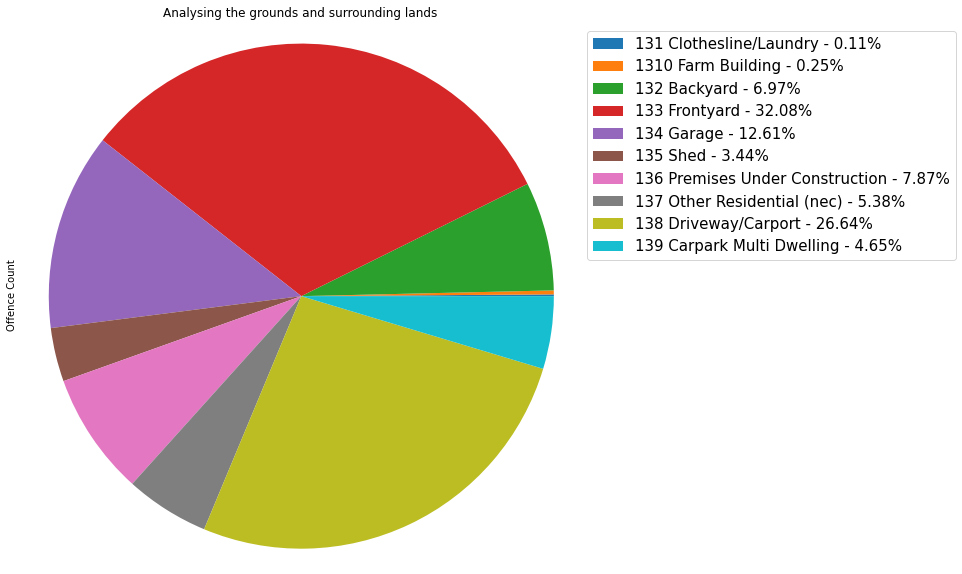

In [148]:
#patches, texts = plt.pie(setting_only_res_3["Offence Count"], labels=setting_only_res_3.index,
        #autopct="%1.1f%%", shadow=True, startangle=220)
#plt.axis("equal")
percent = 100.*setting_only_res_3["Offence Count"]/setting_only_res_3["Offence Count"].sum()
labels = ['{0} - {1:1.2f}%'.format(i,j) for i,j in zip(setting_only_res_3.index, percent)]
pieplot=setting_only_res_3.plot(kind="pie", y="Offence Count", figsize=(10,10), labels=None, title="Analysing the grounds and surrounding lands")
pieplot.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
pieplot.yaxis.label.set_visible(True) # disable y-axis label
pieplot.legend(labels, loc='best', bbox_to_anchor=(1, 1.), fontsize=15)
plt.show()

In [72]:
setting_only_res_3 = only_res_3.groupby(["Location Group"])
setting_only_res_3 = setting_only_res_3.sum()
setting_only_res_3

,Offence Count
Location Group,
131 Clothesline/Laundry,140.0
1310 Farm Building,319.0
132 Backyard,8822.0
133 Frontyard,40610.0
134 Garage,15962.0
135 Shed,4356.0
136 Premises Under Construction,9964.0
137 Other Residential (nec),6811.0
138 Driveway/Carport,33722.0


In [73]:
setting_rank_df = setting_of_crime_df.loc[:,["Local Government Area", "Offence Count"]]
setting_rank_df = setting_rank_df.groupby(["Local Government Area"])
setting_rank_df = setting_rank_df.sum()
setting_rank_df = setting_rank_df.sort_values(by="Offence Count", ascending=False)
setting_rank_df.head(10)


,Offence Count
Local Government Area,
Melbourne,122035.0
Greater Geelong,89354.0
Hume,88567.0
Greater Dandenong,85218.0
Brimbank,82973.0
Casey,72900.0
Frankston,69949.0
Darebin,69286.0
Wyndham,65099.0


In [153]:
only_community = the_top_ten.loc[the_top_ten["Location Division"] == "2 Community", :]
only_community_df = only_community.loc[:, ["Location Subdivision", "Offence Count"]]
only_community_df

,Location Subdivision,Offence Count
654,21 Education,58.0
655,21 Education,46.0
656,21 Education,28.0
657,22 Health,49.0
658,22 Health,26.0
...,...,...
53418,27 Open Space,2.0
53419,28 Street/footpath,0.0
53420,29 Other community location,7.0
53421,29 Other community location,13.0


In [154]:
setting_only_comm = only_community_df.groupby(["Location Subdivision"])
setting_only_comm = setting_only_comm.sum()
setting_only_comm

,Offence Count
Location Subdivision,
21 Education,23366.0
22 Health,13041.0
23 Religious,2901.0
24 Public Transport,43724.0
25 Other Transport,67305.0
26 Justice,45041.0
27 Open Space,23397.0
28 Street/footpath,0.0
29 Other community location,3459.0


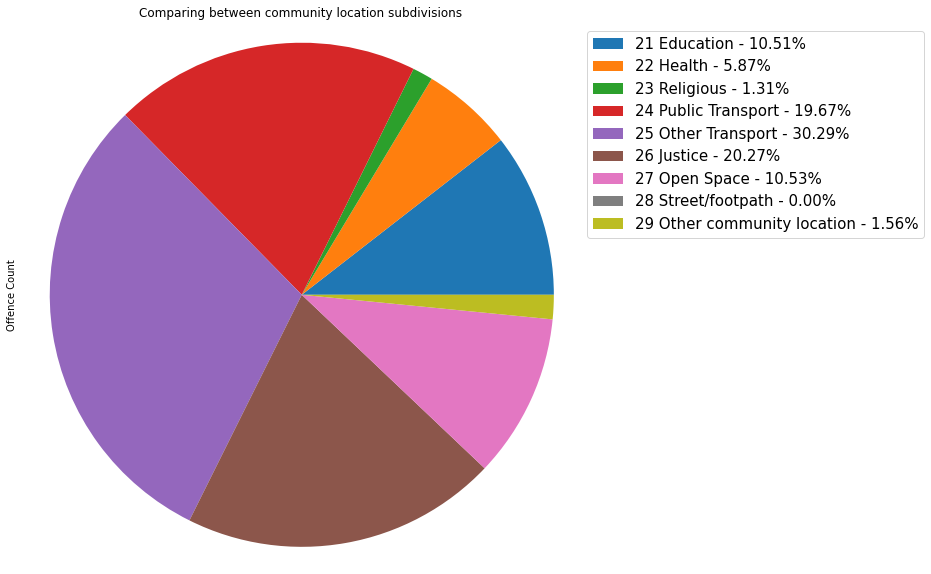

In [166]:
percent = 100.*setting_only_comm["Offence Count"]/setting_only_comm["Offence Count"].sum()
labels = ['{0} - {1:1.2f}%'.format(i,j) for i,j in zip(setting_only_comm.index, percent)]
pieplot2=setting_only_comm.plot(kind="pie", y="Offence Count", figsize=(10,10), labels=None, title="Comparing between community location subdivisions")
pieplot2.axis('equal')
pieplot2.yaxis.label.set_visible(True)
pieplot2.legend(labels, loc='best', bbox_to_anchor=(1, 1.), fontsize=15)
plt.show()